## Credit Score Classification using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing and EDA


In [2]:
credit_data = pd.read_csv("/Users/snehakarki/Downloads/Credit/credit.csv", low_memory = False
                          )
credit_data.shape
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## Exploratory Data Analysis

In [3]:
credit_data.iloc[16:25, 0:20]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,7.1,3.0,Good,1303.01
17,0x161b,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",13,6,7.1,3.0,Good,1303.01
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162.64,NaN,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,7,11.1,NaN,Good,1303.01
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,5,9.1,3.0,_,1303.01
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",10,5,7.1,3.0,Good,1303.01
21,0x161f,CUS_0x2dbc,June,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,967,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01
22,0x1620,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01
24,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,5,4,1,Not Specified,0,6,1.99,4.0,Good,632.46


In [4]:
credit_data.iloc[16:25, 21:28]


,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
16,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
17,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good
18,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
19,NaN,No,246.992319,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,Good
20,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
21,18 Years and 2 Months,No,246.992319,257.80809942568976,High_spent_Medium_value_payments,963.9215811205684,Good
22,18 Years and 3 Months,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard
23,18 Years and 4 Months,No,246.992319,__10000__,High_spent_Small_value_payments,895.494583180492,Standard
24,17 Years and 3 Months,No,16.415452,81.22885871073616,Low_spent_Large_value_payments,433.6047729627723,Standard


In [5]:
import pandas as pd

def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].value_counts()
        print(f"Unique values in column '{column}':")
        print(unique_values)
        print('\n')

display_unique_values(credit_data)

#Findings from analyzing the unique values and discrepencies!

Unique values in column 'ID':
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64


Unique values in column 'Customer_ID':
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64


Unique values in column 'Month':
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64


Unique values in column 'Name':
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: Name, Length: 10139, dtype: int64


Unique value

## Data Preporcessing 

It can be observed after exploring the dataset that there are quite a few issues with it. 
This dataset has records for 8 months - Jan to Aug for each customer(to make our modeling process efficient we will have to reduce the volume so each row represents the credit information for one individual. 
- Now we want to be able to create a profile for each customer in a way that each row is one customer so can proceed with further profiling! 
There are several discrepancies and erroneous data(!@9#%8,__10000__, a lot of null entries, etc.) which needs to be handled, in the next few steps, we will clean and convert the data entries to desirable format which will make our process easier. 


In [6]:

# Step 1: Handle missing and erroneous values
erroneous_values = ['<NA>', 'NaN', 'nan', '?', '_______', '#F%$D@*&8', '!@9#%8', '_']
credit_data.replace(erroneous_values, np.nan, inplace=True)

credit_data['Num_of_Loan'] = credit_data['Num_of_Loan'].fillna(0)

# Step 2: Handle customer-specific data
customer_specific_columns = ['Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary']

def replace_incorrect_ages(group):
    common_age = group['Age'].mode()[0]
    group['Age'].fillna(common_age, inplace=True)
    return group

credit_data = credit_data.groupby('Customer_ID').apply(replace_incorrect_ages).reset_index(drop=True)

for col in customer_specific_columns:
    most_common_values = credit_data.groupby('Customer_ID')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    credit_data[col] = credit_data.apply(lambda row: most_common_values[row['Customer_ID']] if pd.isnull(row[col]) else row[col], axis=1)

# Step 3: Handle remaining missing values
for col in credit_data.columns:
    if credit_data[col].dtype in ['int64', 'float64']:
        credit_data[col].fillna(credit_data[col].mean(), inplace=True)
    else:
        credit_data[col].fillna(credit_data[col].mode()[0], inplace=True)

# Step 4: Handle 'Age' and 'Delay_from_due_date' columns
credit_data['Age'] = pd.to_numeric(credit_data['Age'], errors='coerce')
credit_data['Age'] = credit_data['Age'].apply(lambda x: np.nan if x < 0 else x)
credit_data['Age'].fillna(credit_data['Age'].mean(), inplace=True)

credit_data['Delay_from_due_date'] = pd.to_numeric(credit_data['Delay_from_due_date'], errors='coerce')
credit_data['Delay_from_due_date'] = credit_data['Delay_from_due_date'].apply(lambda x: np.nan if x < 0 else x)
credit_data['Delay_from_due_date'].fillna(credit_data['Delay_from_due_date'].mean(), inplace=True)

# Step 5: Convert data types
numeric_columns = [
    'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt',
    'Amount_invested_monthly', 'Monthly_Balance'
]

credit_data[numeric_columns] = credit_data[numeric_columns].apply(pd.to_numeric, errors='coerce')




In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              100000 non-null  ob

In [13]:
credit_data.Num_of_Loan.value_counts

#kept getting an error about this columns having non-finite values
credit_data['Num_of_Loan'] = credit_data['Num_of_Loan'].replace([np.nan, np.inf, -np.inf], 0)
credit_data['Num_of_Delayed_Payment'] = credit_data['Num_of_Delayed_Payment'].replace([np.nan, np.inf, -np.inf], 0)


In [14]:
#Datatype conversion
credit_data['Age'] = credit_data['Age'].astype(int)
credit_data['Annual_Income'] = credit_data['Annual_Income'].astype(float)
credit_data['Monthly_Inhand_Salary'] = credit_data['Monthly_Inhand_Salary'].astype(float)
credit_data['Num_of_Loan'] = credit_data['Num_of_Loan'].astype(int)
credit_data['Num_of_Delayed_Payment'] = credit_data['Num_of_Delayed_Payment'].astype(int)
credit_data['Num_Credit_Inquiries'] = credit_data['Num_Credit_Inquiries'].astype(int)
credit_data['Changed_Credit_Limit'] = credit_data['Changed_Credit_Limit'].astype(float)
credit_data['Outstanding_Debt'] = credit_data['Outstanding_Debt'].astype(float)
credit_data['Credit_Utilization_Ratio'] = credit_data['Credit_Utilization_Ratio'].astype(float)
credit_data['Total_EMI_per_month'] = credit_data['Total_EMI_per_month'].astype(float)
credit_data['Amount_invested_monthly'] = credit_data['Amount_invested_monthly'].astype(float)
credit_data['Monthly_Balance'] = credit_data['Monthly_Balance'].astype(float)


#Final checks and output
print("Dataset Info:")
print(credit_data.info())

print("\nFirst few rows:")
print(credit_data.head())

print("\nNull value counts:")
print(credit_data.isnull().sum())

print("\nColumn data types:")
print(credit_data.dtypes)

null_counts = credit_data.isnull().sum()
print(null_counts)

# Print data types of columns
print(credit_data.dtypes)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              10000

So we have handled missing data, dealt with erroneous data and removed any discrepencies we may have had! Now, we can proceed with the next steps for customer profiling!

Before creating a data split for model building, we finish up any more conversion that might help the process.

In [16]:
#longer the credit history, the better -
import re

def convert_to_months(age_str):
    match = re.match(r"(\d+) Years and (\d+) Months", age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        total_months = years * 12 + months
        return total_months
    else:
        return np.nan  # Return NaN if the format doesn't match



In [17]:
# Apply the conversion function
credit_data['Credit_History_Age_Months'] = credit_data['Credit_History_Age'].apply(convert_to_months)


In [18]:
agg_funcs = {
    'Name': 'first',   # Assuming the name doesn't change
    'Age': 'mean',  # Assuming age should be the latest recorded
    'SSN': 'first',  # Assuming SSN doesn't change
    'Occupation': 'first',  # Assuming occupation doesn't change
    'Annual_Income': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Monthly_Inhand_Salary': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Num_Bank_Accounts': 'max',  # Assuming the highest number recorded
    'Num_Credit_Card': 'max',  # Assuming the highest number recorded
    'Interest_Rate': 'mean',  # Averaging the interest rates
    'Num_of_Loan': 'max',  # Assuming the highest number recorded
    'Type_of_Loan': 'first',  # Assuming the loan type doesn't change
    'Delay_from_due_date': 'mean',  # Averaging the delay days
    'Num_of_Delayed_Payment': 'max',  # Taking the maximum value
    'Changed_Credit_Limit': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Num_Credit_Inquiries': 'max',  # Taking the maximum value
    'Credit_Mix': 'first',  # Assuming the credit mix doesn't change
    'Outstanding_Debt': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Credit_Utilization_Ratio': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Credit_History_Age': 'first',  # Assuming the credit history age doesn't change
    'Payment_of_Min_Amount': 'first',  # Assuming this doesn't change
    'Total_EMI_per_month': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Amount_invested_monthly': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Payment_Behaviour': 'first',  # Assuming this doesn't change
    'Monthly_Balance': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Credit_Score': 'first',  # Assuming the credit score category doesn't change
    'Credit_History_Age_Months': 'max'  # Taking the maximum value
}


#Group our dataset by Customer_ID and the aggregate functions for each column
credit_per_cust = credit_data.groupby('Customer_ID').agg(agg_funcs).reset_index()


In [19]:
credit_per_cust.Credit_Score.value_counts()

Standard    6943
Poor        3582
Good        1975
Name: Credit_Score, dtype: int64

## Class Imbalance

When working on a classification project, it is imperative to test the class/target for any imbalances. As we can see from the results above, our target here i.e. Credit_Score has some class imbalance to it. So, we will use a SMOTE technique to handle this issue so our model building process can occur smoothly. 

There are various other options like assigning weights to each class and many more but this particular method helped the models perform better comparatively.

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

features = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio',
            'Outstanding_Debt', 'Credit_History_Age_Months', 'Num_Bank_Accounts',
            'Num_Credit_Card', 'Num_of_Loan', 'Num_Credit_Inquiries', 'Annual_Income', 'Interest_Rate']

X = credit_per_cust[features]
y = credit_per_cust['Credit_Score']

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [21]:
#Since we will be training and testing the performance on multiple models/algorithms, we create a function

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n{model_name} Training and Evaluation:")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, predictions))
    print("\nClassification Report:\n", classification_report(y_test, predictions))

    conf_matrix = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    return model

## Logistic Regression


Logistic Regression Training and Evaluation:
Accuracy: 0.58432

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.78      0.51       496
           1       0.63      0.74      0.68       888
           2       0.74      0.45      0.56      1741

    accuracy                           0.58      3125
   macro avg       0.58      0.65      0.58      3125
weighted avg       0.65      0.58      0.59      3125



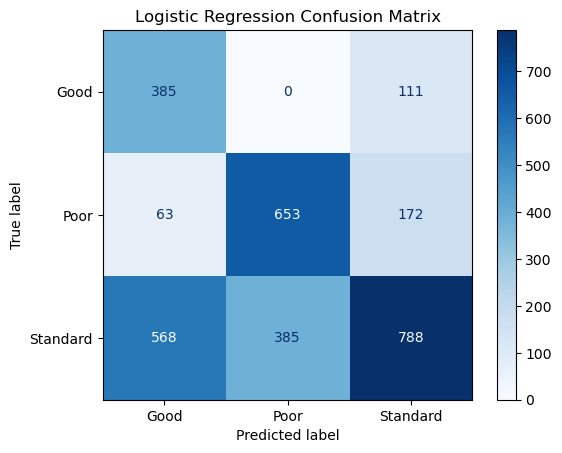

In [33]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model = train_and_evaluate_model(lr_model, X_train_scaled, y_train_res, X_test_scaled, y_test, "Logistic Regression")


## Gradient Boosting Classifier


Gradient Boosting Training and Evaluation:
Accuracy: 0.71776

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.79      0.64       496
           1       0.68      0.81      0.74       888
           2       0.84      0.65      0.73      1741

    accuracy                           0.72      3125
   macro avg       0.69      0.75      0.71      3125
weighted avg       0.75      0.72      0.72      3125



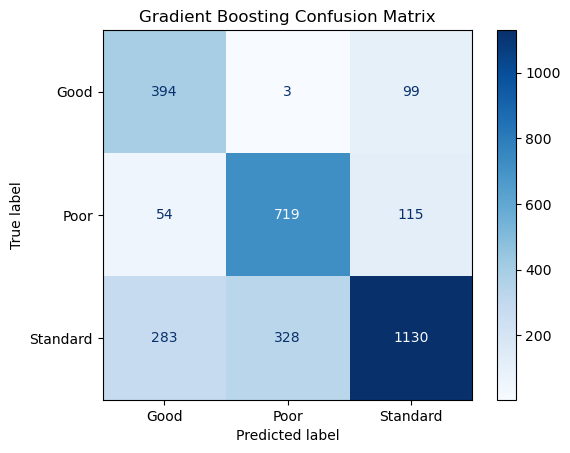

In [35]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model = train_and_evaluate_model(gb_model, X_train_scaled, y_train_res, X_test_scaled, y_test, "Gradient Boosting")

## Support Vector Machine


Support Vector Machine Training and Evaluation:
Accuracy: 0.59872

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.75      0.50       496
           1       0.64      0.80      0.71       888
           2       0.77      0.45      0.57      1741

    accuracy                           0.60      3125
   macro avg       0.60      0.67      0.59      3125
weighted avg       0.67      0.60      0.60      3125



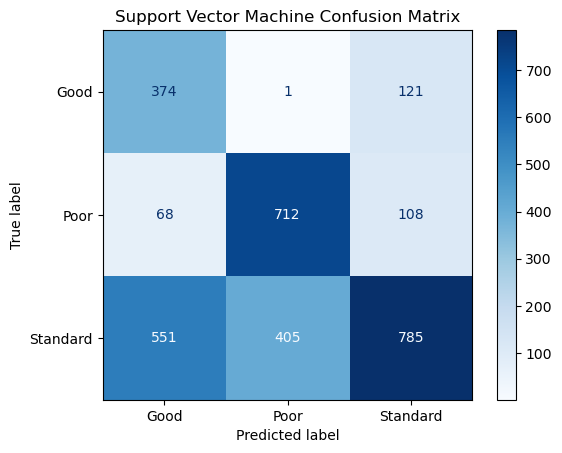

In [24]:
svm_model = SVC(random_state=42, probability=True)
svm_model = train_and_evaluate_model(svm_model, X_train_scaled, y_train_res, X_test_scaled, y_test, "Support Vector Machine")


## Decision Tree


Decision Tree Training and Evaluation:
Accuracy: 0.63968

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.60      0.53       496
           1       0.60      0.65      0.62       888
           2       0.73      0.65      0.69      1741

    accuracy                           0.64      3125
   macro avg       0.60      0.63      0.61      3125
weighted avg       0.65      0.64      0.64      3125



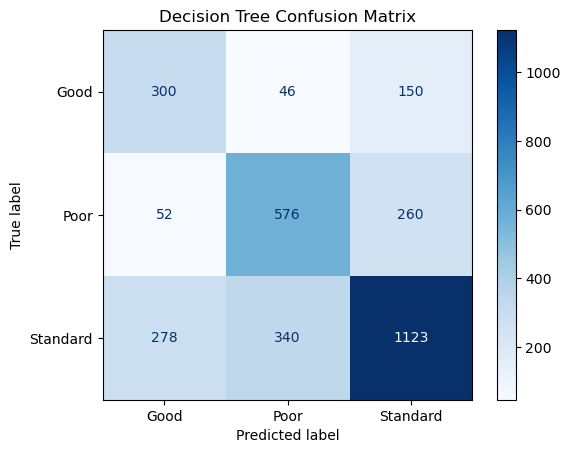

In [25]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model = train_and_evaluate_model(dt_model, X_train_scaled, y_train_res, X_test_scaled, y_test, "Decision Tree")


## Random Forest


Random Forest Training and Evaluation:
Accuracy: 0.7152

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.77      0.63       496
           1       0.69      0.80      0.74       888
           2       0.83      0.66      0.73      1741

    accuracy                           0.72      3125
   macro avg       0.68      0.74      0.70      3125
weighted avg       0.74      0.72      0.72      3125



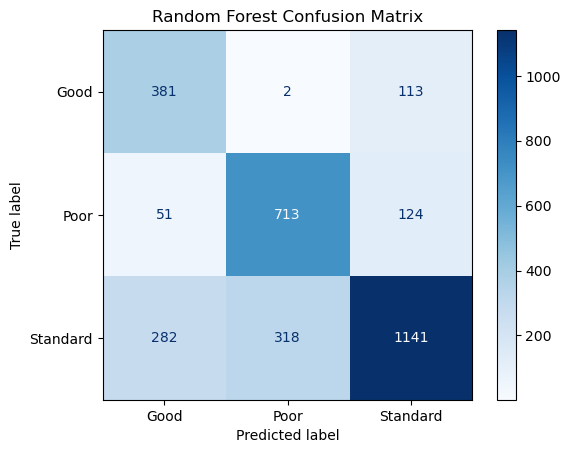

In [26]:
rf_model = RandomForestClassifier(random_state=42)
rf_model = train_and_evaluate_model(rf_model, X_train_scaled, y_train_res, X_test_scaled, y_test, "Random Forest")

## Ensemble Learning (Voting Classifier)


Ensemble (Voting Classifier) Training and Evaluation:
Accuracy: 0.72256

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.80      0.65       496
           1       0.69      0.81      0.74       888
           2       0.84      0.66      0.74      1741

    accuracy                           0.72      3125
   macro avg       0.69      0.76      0.71      3125
weighted avg       0.75      0.72      0.73      3125



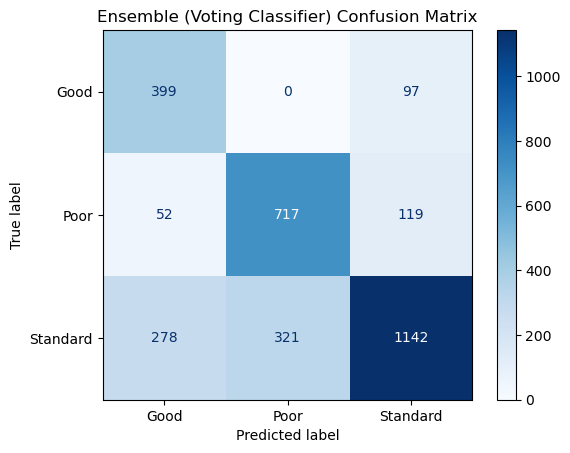

In [29]:
ensemble_model = VotingClassifier(
    estimators=[

        ('gb', GradientBoostingClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ],
    voting='hard'
)
ensemble_model = train_and_evaluate_model(ensemble_model, X_train_scaled, y_train_res, X_test_scaled, y_test, "Ensemble (Voting Classifier)")

In [30]:
# Compare models
models = {
    "Logistic Regression": lr_model,
    "Gradient Boosting": gb_model,
    "Support Vector Machine": svm_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Ensemble": ensemble_model
}

# Choose the best model based on accuracy
best_model_name = max(models, key=lambda x: accuracy_score(y_test, models[x].predict(X_test_scaled)))
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")


Best Model: Ensemble


### Credit profiling using our best model


In [27]:
# Credit profiling using the best model
X_scaled = scaler.transform(X)
credit_per_cust['Predicted_Credit_Score'] = best_model.predict(X_scaled)
credit_per_cust['Credit_Profile'] = credit_per_cust['Predicted_Credit_Score'].map({0: 'Good', 1: 'Poor', 2: 'Standard'})
credit_per_cust[['Customer_ID', 'Credit_Score','Predicted_Credit_Score', 'Credit_Profile']].head(10)

,Customer_ID,Credit_Score,Predicted_Credit_Score,Credit_Profile
0,CUS_0x1000,Standard,1,Poor
1,CUS_0x1009,Standard,2,Standard
2,CUS_0x100b,Poor,1,Poor
3,CUS_0x1011,Standard,2,Standard
4,CUS_0x1013,Standard,2,Standard
5,CUS_0x1015,Standard,2,Standard
6,CUS_0x1018,Poor,1,Poor
7,CUS_0x1026,Standard,2,Standard
8,CUS_0x102d,Good,0,Good
9,CUS_0x102e,Standard,2,Standard


# Findings and Interpretation

After training and testing different models lke LR, GB, SVM, DT,RF and an ensemble (of GB, DT and RF), ensemble method turned out to be the best model. 

1. Logistic Regression
- Accuracy: 0.58432
- Classification Report:
  - Precision: Good (0.38), Standard (0.63), Poor (0.74)
  - Recall: Good (0.78), Standard (0.74), Poor (0.45)
  - F1-score: Good (0.51), Standard (0.68), Poor (0.56)
<br>

**Interpretation**: Logistic Regression shows moderate performance with an accuracy of 58.43%. It tends to perform well in identifying the Standard and Poor classes but struggles with the Good class.

2. Gradient Boosting
- Accuracy: 0.71776
- Classification Report: 
  - Precision: Good (0.54), Standard (0.68), Poor (0.84)
  - Recall: Good (0.79), Standard (0.81), Poor (0.65)
  - F1-score: Good (0.64), Standard (0.74), Poor (0.73)
<br>

**Interpretation**: Gradient Boosting achieves a higher accuracy of 71.78%. It shows balanced performance across all classes, particularly excelling in identifying Poor credit scores.

3. Support Vector Machine
- Accuracy: 0.59872
- Classification Report:
  - Precision: Good (0.38), Standard (0.64), Poor (0.77)
  - Recall: Good (0.75), Standard (0.80), Poor (0.45)
  - F1-score: Good (0.50), Standard (0.71), Poor (0.57)
<br>

**Interpretation**: SVM shows similar performance to Logistic Regression with an accuracy of 59.87%. It performs well for the Standard class but struggles with the Good class.

4. Decision Tree
- Accuracy: 0.63968
- Classification Report:
  - Precision:  Good (0.48), Standard (0.60), Poor (0.73)
  - Recall: Good (0.60), Standard (0.65), Poor (0.65)
  - F1-score: Good (0.53), Standard (0.62), Poor (0.69)
<br>

**Interpretation**: Decision Tree achieves an accuracy of 63.97%. It performs reasonably well across all classes, particularly for the Poor class.

5. Random Forest
- Accuracy: 0.7152
- Classification Report:
  - Precision: Good (0.53), Standard (0.69), Poor (0.83)
  - Recall: Good (0.77), Standard (0.80), Poor (0.66)
  - F1-score: Good (0.63), Standard (0.74), Poor (0.73)
<br>

**Interpretation**: Random Forest achieves a high accuracy of 71.52%. It shows strong performance across all classes, especially excelling in identifying Poor credit scores.

6. Ensemble (Voting Classifier)
- Accuracy: 0.72256
- Classification Report:
  - Precision: Good (0.55), Standard (0.69), Poor (0.84)
  - Recall: Good (0.80), Standard (0.81), Poor (0.66)
  - F1-score: Good (0.65), Standard (0.74), Poor (0.74)
<br>

**Interpretation**: The ensemble method, combining Decision Tree, Random Forest, and Gradient Boosting, achieves the highest accuracy of 72.26%. It provides the most balanced performance across all classes, particularly excelling in identifying Good and Poor credit scores.

1. **Best Performing Model**: The ensemble model (Voting Classifier) achieved the highest accuracy and balanced performance across all metrics. This makes it the most reliable model for credit score prediction.

2. **Class Imbalance Handling**: All models benefited from handling class imbalance using techniques like SMOTE. This improved the recall and precision for the minority class (Good).

## Conclusion 
The ensemble model (Voting Classifier) is recommended for credit score prediction due to its superior performance in terms of accuracy, precision, recall, and F1-score. This model effectively handles class imbalance and provides reliable predictions across all credit score categories (Good, Standard, Poor).